Excitation Energies: [ 123.865   123.9453  123.9488  123.98    124.0896  124.1056  124.1064
  124.2098  124.4498  124.5266  124.5635  124.5972  124.6236  124.6824
  124.7069  124.7747  124.8107  124.8151  124.8622  124.9699  125.0183
  125.1213  125.1279  125.4025  125.4279  125.4867  125.55    125.5881
  125.6806  125.7606  125.7751  125.7845  125.8327  125.8513  125.998
  126.0737  126.1505  126.2107  126.2203  126.4811  126.4939  126.5494
  126.615   126.6157  126.629   126.7191  126.744   126.8306  126.832
  126.8365  126.9833  127.0374  127.1356  127.2837  127.3356  127.5802
  127.6024  127.66    127.7963  127.973   128.0546  128.1025  128.1087
  128.1862  128.1871  128.2519  128.3539  128.3654  128.4319  128.4743
  128.5453  128.6499  128.664   128.7565  128.8494  128.8673  128.9
  129.0481  129.2753  129.2973  129.3511  129.5786  129.6267  129.6473
  129.6906  129.7868  129.9547  130.4204  130.4993  130.633   130.7381
  130.8766  130.8949  131.1212  131.3709  131.4111  131.4455 

C:\Users\eleta\AppData\Local\Temp\ipykernel_23600\1330538930.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


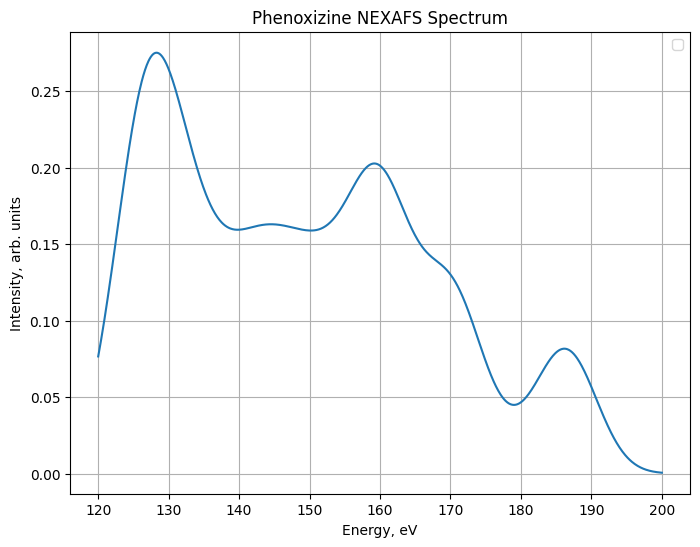

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = 'C:/Users/eleta/OneDrive/Desktop/Mokslai/DataScienceNotebooks/Studentai/EleTame/Bandymas_Spektras.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Assuming the first column is excitation energies and the second is oscillator strengths
excitation_energies = data.iloc[:, 0].values  # First column
oscillator_strengths = data.iloc[:, 1].values  # Second column

# Check if data is loaded correctly
print("Excitation Energies:", excitation_energies)
print("Oscillator Strengths:", oscillator_strengths)

# Parameters for Gaussian broadening
broadening_width = 10  # Full Width at Half Maximum (FWHM) in eV
energy_range = np.linspace(120, 200, 1000)  # energy range for the spectrum

def gaussian_broadening(energy, center, intensity, width):
    """Apply Gaussian broadening to a single transition."""
    sigma = width / (2.0 * np.sqrt(2.0 * np.log(2.0)))  # Convert FWHM to sigma
    return intensity * np.exp(-(energy - center)**2 / (2.0 * sigma**2))

# Initialize the spectrum
spectrum = np.zeros_like(energy_range)

# Sum the broadened transitions to form the spectrum
for energy, strength in zip(excitation_energies, oscillator_strengths):
    broadened = gaussian_broadening(energy_range, energy, strength, broadening_width)
    print(f"Center: {energy}, Strength: {strength}, Broadening Result: {broadened}")
    spectrum += broadened

# Plotting the spectrum
plt.figure(figsize=(8, 6))
plt.plot(energy_range, spectrum)
plt.xlabel('Energy, eV')
plt.ylabel('Intensity, arb. units')
plt.title('Phenoxizine NEXAFS Spectrum')
plt.legend()
plt.grid(True)
plt.show()

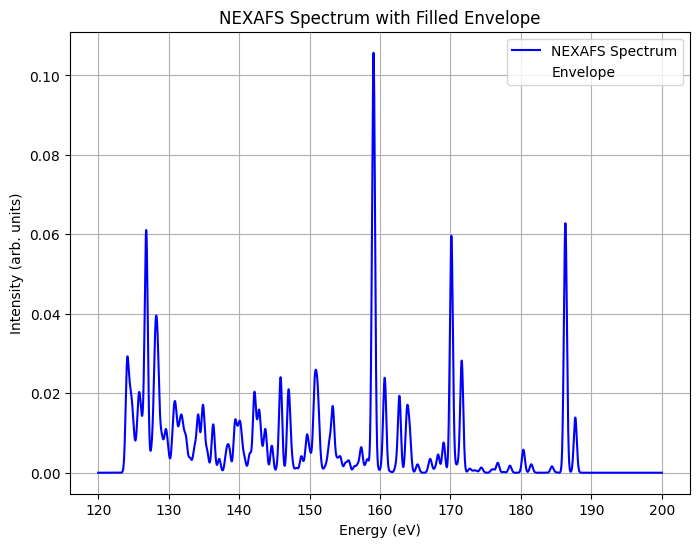

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = 'C:/Users/eleta/OneDrive/Desktop/Mokslai/DataScienceNotebooks/Studentai/EleTame/Bandymas_Spektras.xlsx'
data = pd.read_excel(file_path)

# Assuming the first column is excitation energies and the second is oscillator strengths
excitation_energies = data.iloc[:, 0].values
oscillator_strengths = data.iloc[:, 1].values

# Parameters for Gaussian broadening
broadening_width = 0.5  # Full Width at Half Maximum (FWHM) in eV. Sitai galiu pareguliuoti, kad spektras butu panasus i eksperimentini
energy_range = np.linspace(120, 200, 10000)  # Increase the number of points for smoother spectrum

def gaussian_broadening(energy, center, intensity, width):
    """Apply Gaussian broadening to a single transition."""
    sigma = width / (2.0 * np.sqrt(2.0 * np.log(2.0)))  # Convert FWHM to sigma
    return intensity * np.exp(-(energy - center)**2 / (2.0 * sigma**2))

# Initialize the spectrum
spectrum = np.zeros_like(energy_range)

# Sum the broadened transitions to form the spectrum
for energy, strength in zip(excitation_energies, oscillator_strengths):
    spectrum += gaussian_broadening(energy_range, energy, strength, broadening_width)

# Plotting the spectrum with a filled envelope
plt.figure(figsize=(8, 6))
plt.plot(energy_range, spectrum, label='Phenoxizine NEXAFS Spectrum', color='blue')
plt.fill_between(energy_range, spectrum, color='white', alpha=0.3, label='Envelope')

# Customizing the plot
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (arb. units)')
plt.title('Phenoxizine NEXAFS Spectrum')
plt.legend()
plt.grid(True)
plt.show()

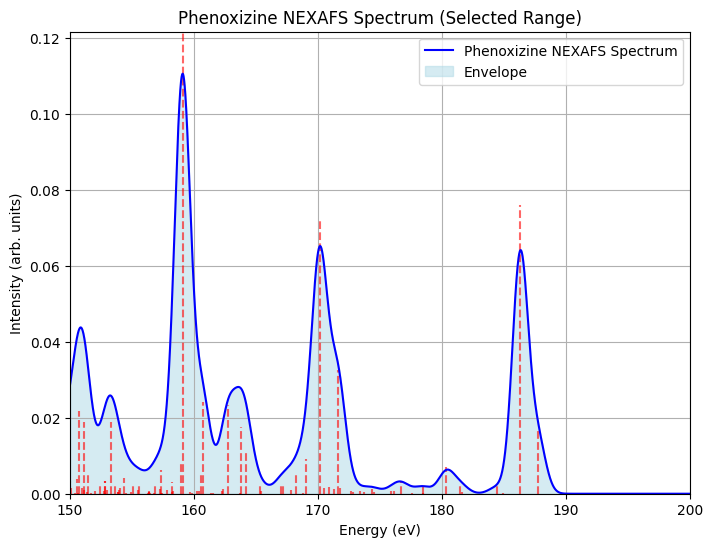

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = 'C:/Users/eleta/OneDrive/Desktop/Mokslai/DataScienceNotebooks/Studentai/EleTame/Bandymas_Spektras.xlsx'
data = pd.read_excel(file_path)

# Assuming the first column is excitation energies and the second is oscillator strengths
excitation_energies = data.iloc[:, 0].values
oscillator_strengths = data.iloc[:, 1].values

# Parameters for Gaussian broadening
broadening_width = 1.5  # Full Width at Half Maximum (FWHM) in eV. Adjust to match experimental spectrum
energy_range = np.linspace(120, 200, 10000)  # Increase the number of points for smoother spectrum

def gaussian_broadening(energy, center, intensity, width):
    """Apply Gaussian broadening to a single transition."""
    sigma = width / (2.0 * np.sqrt(2.0 * np.log(2.0)))  # Convert FWHM to sigma
    return intensity * np.exp(-(energy - center)**2 / (2.0 * sigma**2))

# Initialize the spectrum
spectrum = np.zeros_like(energy_range)

# Sum the broadened transitions to form the spectrum
for energy, strength in zip(excitation_energies, oscillator_strengths):
    spectrum += gaussian_broadening(energy_range, energy, strength, broadening_width)

# Define the range to plot
min_energy = 150
max_energy = 200

# Plotting the individual transitions as vertical lines within the selected range
plt.figure(figsize=(8, 6))
for energy, strength in zip(excitation_energies, oscillator_strengths):
    if min_energy <= energy <= max_energy:
        plt.axvline(x=energy, ymin=0, ymax=strength/np.max(oscillator_strengths), color='red', alpha=0.6, linestyle='--', label='Transition' if energy == excitation_energies[0] else "")

# Plotting the spectrum with a filled envelope within the selected range
plt.plot(energy_range, spectrum, label='Phenoxizine NEXAFS Spectrum', color='blue')
plt.fill_between(energy_range, spectrum, where=(energy_range >= min_energy) & (energy_range <= max_energy), color='lightblue', alpha=0.5, label='Envelope')

# Customizing the plot
plt.xlim(min_energy, max_energy)
plt.ylim(0, max(spectrum) * 1.1)  # Y axis starts from 0 and extends slightly beyond the maximum value
plt.xlabel('Energy (eV)')
plt.ylabel('Intensity (arb. units)')
plt.title('Phenoxizine NEXAFS Spectrum (Selected Range)')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------- -------------------------- 20.5/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 537.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/44.5 MB 2.7 MB/s eta 0:00:17
   ---------------------------------------- 0.1/44.5 MB 1.5 MB/s eta 0:00:30
   ---------------------------------------- 0.2/44.5 MB 1.5 MB/s eta 0:00:30
   ---------------------------------------- 0.2/44.5 MB 1.2 MB/s eta 0:00:38
   ---------------------------------------- 0.2/44.5 MB 1.1 MB/s eta 0:00:39
   ---------------------------------------- 0.3/44.5 MB 1.2 MB/s eta 0:00:36
   ---------------------------------------- 0.3/44.5 MB 1.3 MB/s eta 0:00:34
   ---------------------------------------- 0.4/44.5 MB 1.2 MB/s eta 0:00:39
   ------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/250.9 kB 435.7 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/250.9 kB 563.7 kB/s eta 0:00:01
   --------------------- ---------------- 143.4/250.9 kB 950.9 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/250.9 kB 958.4 kB/s eta 0:00:01
   ---------------------------------- --- 225.3/250.9 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- 250.9/250.9 kB 856.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
